In [1]:
import os
import shutil
import tensorflow as tf
import PIL.Image
import matplotlib.pyplot as plt

# www.kaggle.com/c/dogs-vs-cats/data
Download dataset from link above

In [2]:
original_dataset_dir = "train"      # jis folders mai sare pics hai name ke sath

In [3]:
base_dir = 'cats_and_dogs_small' 
os.mkdir(base_dir)                          # created new empty folder in current directory
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)                         # us folder ke ander train ka folder banaya
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)                    # and so on
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats') 
os.mkdir(train_cats_dir)                   # cat ka folder banaya train ke ander
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)                   # dog ka folder banaya train ke ander

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)                    # cat ka folder banaya test ke ander
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)                    # dog ka folder banaya test ke ander

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)               # cat ka folder banaya validation ke ander
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)               # dog ka folder banaya validation ke ander

In [5]:
# we only created empty folders in above coding
# os.mkdir se new folder bante hai bake folder names ya path hai
# Now we are going to copy files in those folders

In [6]:
fnames = []
for i in range(1000):              # created names, not files, same as in orignal files name
    a = 'cat.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                   # copying cats pics in empty train folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(train_cats_dir, x)
    shutil.copyfile(src, dst)

In [7]:
fnames = []
for i in range(1000, 1500):              # created names, not files, same as in orignal files name
    a = 'cat.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                        # copying cats pics in empty validation folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(validation_cats_dir, x)
    shutil.copyfile(src, dst)

In [8]:
fnames = []
for i in range(1500, 2000):              # created names, not files, same as in orignal files name
    a = 'cat.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                         # copying cats pics in empty test folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(test_cats_dir, x)
    shutil.copyfile(src, dst)

In [9]:
# above copied 1000 train, 500 test $ 500 validation cats pictures
# now doing same for dogs

In [10]:
fnames = []
for i in range(1000):              # created names, not files, same as in orignal files name
    a = 'dog.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                   # copying dogs pics in empty train folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(train_dogs_dir, x)
    shutil.copyfile(src, dst)

In [11]:
fnames = []
for i in range(1000, 1500):              # created names, not files, same as in orignal files name
    a = 'dog.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                        # copying dogs pics in empty validation folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(validation_dogs_dir, x)
    shutil.copyfile(src, dst)

In [12]:
fnames = []
for i in range(1500, 2000):              # created names, not files, same as in orignal files name
    a = 'dog.{}.jpg'.format(i)
    fnames.append(a)
for x in fnames:                         # copying dogs pics in empty test folder
    src = os.path.join(original_dataset_dir, x)
    dst = os.path.join(test_dogs_dir, x)
    shutil.copyfile(src, dst)

# First model

In [13]:
models = tf.keras.Sequential
layers = tf.keras.layers

model = models([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(128, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(128, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Flatten(),
                layers.Dense(512, activation='relu'),
                layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
# Normalizing Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
# reshaping training images
train_generator = train_datagen.flow_from_directory(
                  train_dir,target_size=(150, 150),
                  batch_size=20,class_mode='binary') # binary create labels

Found 2000 images belonging to 2 classes.


In [17]:
# reshaping validation images
validation_generator = test_datagen.flow_from_directory(
                       validation_dir,target_size=(150, 150),
                       batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [18]:
# reshaping training images
test_generator =  train_datagen.flow_from_directory(
                  test_dir,target_size=(150, 150),
                  batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [19]:
epochs = 30
history = model.fit_generator(
          train_generator,steps_per_epoch=100,
          epochs=epochs,validation_data=validation_generator,
          validation_steps=50)

Epoch 1/30
100/100 [==============================] - 19s 192ms/step - loss: 0.6912 - accuracy: 0.5230 - val_loss: 0.6699 - val_accuracy: 0.5950
Epoch 2/30
100/100 [==============================] - 16s 156ms/step - loss: 0.6607 - accuracy: 0.6010 - val_loss: 0.6427 - val_accuracy: 0.6220
Epoch 3/30
100/100 [==============================] - 16s 157ms/step - loss: 0.6264 - accuracy: 0.6550 - val_loss: 0.6200 - val_accuracy: 0.6520
Epoch 4/30
100/100 [==============================] - 16s 158ms/step - loss: 0.5813 - accuracy: 0.6975 - val_loss: 0.6197 - val_accuracy: 0.6350
Epoch 5/30
100/100 [==============================] - 16s 157ms/step - loss: 0.5400 - accuracy: 0.7350 - val_loss: 0.5752 - val_accuracy: 0.6910
Epoch 6/30
100/100 [==============================] - 16s 159ms/step - loss: 0.5007 - accuracy: 0.7495 - val_loss: 0.5718 - val_accuracy: 0.6960
Epoch 7/30
100/100 [==============================] - 16s 160ms/step - loss: 0.4790 - accuracy: 0.7700 - val_loss: 0.5554 - val_ac

In [20]:
#evaluation = model.evaluate_generator(test_generator,steps=None,callbacks=None,max_queue_size=10,
#                                      workers=1,use_multiprocessing=False,verbose=0,)
#print("Loss: ",evaluation[0]*100,"%")
#print("Accuracy: ",evaluation[1]*100,"%")

In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting training and validation loss

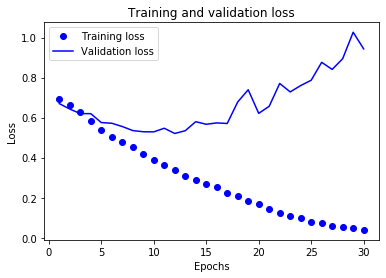

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy

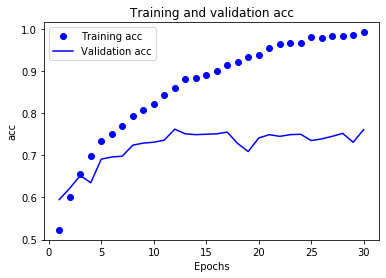

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [24]:
# saving the model
model.save('cats_and_dogs_small_1.h5')

# Using data augmentation to create new pictures
### because we use very little data

In [25]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
                             height_shift_range=0.2,shear_range=0.2,
                             zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [26]:
# Displaying some randomly augmented training images

In [27]:
from tensorflow.keras.preprocessing import image
fnames = []
for i in os.listdir(train_cats_dir):
    a = os.path.join(train_cats_dir, i)
    fnames.append(a)
#fnames have the pictures names with location
print(fnames[3])

cats_and_dogs_small\train\cats\cat.100.jpg


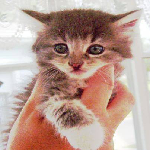

In [28]:
# lets show 1 image
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
img

In [29]:
# converted above picture in ndarray for data augmentaion
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
#x

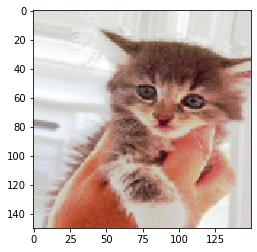

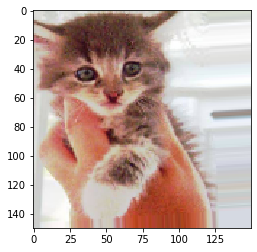

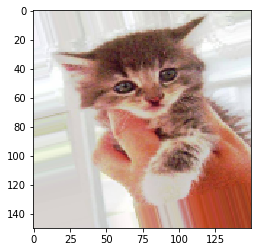

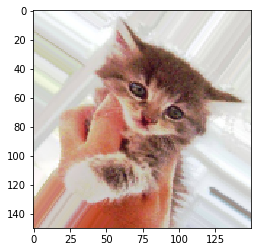

In [30]:
# making 4 pictures from 1 picture
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# Defining a new convnet that includes dropout

In [31]:
models = tf.keras.Sequential
layers = tf.keras.layers

model1 = models([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(128, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Conv2D(128, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Flatten(),
                layers.Dropout(0.5),
                layers.Dense(512, activation='relu'),
                layers.Dense(1, activation='sigmoid')])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [32]:
from tensorflow.keras import optimizers

model1.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the convnet using data-augmentation generators

In [33]:
# genrating new pictures and rescaling it

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,
                width_shift_range=0.2,height_shift_range=0.2,
                shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)

In [34]:
# only rescaling

test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
# Note that the validation data shouldn’t be augmented!

In [36]:
train_generator = train_datagen.flow_from_directory(
                  train_dir,target_size=(150, 150),
                  batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [37]:
validation_generator = test_datagen.flow_from_directory(
                       validation_dir,target_size=(150, 150),
                       batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [38]:
epochs = 100
history1 = model1.fit_generator(
          train_generator,steps_per_epoch=100,
          epochs=epochs,validation_data=validation_generator,
          validation_steps=50)

Epoch 1/100
100/100 [==============================] - 25s 246ms/step - loss: 0.6949 - accuracy: 0.5015 - val_loss: 0.6883 - val_accuracy: 0.5950
Epoch 2/100
100/100 [==============================] - 22s 224ms/step - loss: 0.6883 - accuracy: 0.5455 - val_loss: 0.6923 - val_accuracy: 0.5010
Epoch 3/100
100/100 [==============================] - 22s 222ms/step - loss: 0.6754 - accuracy: 0.5710 - val_loss: 0.6873 - val_accuracy: 0.5330
Epoch 4/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6611 - accuracy: 0.6000 - val_loss: 0.6328 - val_accuracy: 0.6350
Epoch 5/100
100/100 [==============================] - 52s 523ms/step - loss: 0.6452 - accuracy: 0.6160 - val_loss: 0.6299 - val_accuracy: 0.6300
Epoch 6/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6310 - accuracy: 0.6525 - val_loss: 0.6785 - val_accuracy: 0.5810
Epoch 7/100
100/100 [==============================] - 22s 223ms/step - loss: 0.6158 - accuracy: 0.6575 - val_loss: 0.5871 -

Epoch 57/100
100/100 [==============================] - 57s 571ms/step - loss: 0.4598 - accuracy: 0.7905 - val_loss: 0.4679 - val_accuracy: 0.7750
Epoch 58/100
100/100 [==============================] - 22s 216ms/step - loss: 0.4646 - accuracy: 0.7830 - val_loss: 0.4723 - val_accuracy: 0.7770
Epoch 59/100
100/100 [==============================] - 22s 218ms/step - loss: 0.4592 - accuracy: 0.7880 - val_loss: 0.4594 - val_accuracy: 0.7810
Epoch 60/100
100/100 [==============================] - 27s 265ms/step - loss: 0.4458 - accuracy: 0.7840 - val_loss: 0.4859 - val_accuracy: 0.7660
Epoch 61/100
100/100 [==============================] - 59s 595ms/step - loss: 0.4389 - accuracy: 0.7955 - val_loss: 0.4421 - val_accuracy: 0.7940
Epoch 62/100
100/100 [==============================] - 22s 218ms/step - loss: 0.4411 - accuracy: 0.7905 - val_loss: 0.4772 - val_accuracy: 0.7670
Epoch 63/100
100/100 [==============================] - 22s 216ms/step - loss: 0.4447 - accuracy: 0.7795 - val_loss: 0

In [39]:
#evaluation1 = model1.evaluate_generator(test_generator,steps=None,callbacks=None,max_queue_size=10,
#                                      workers=1,use_multiprocessing=False,verbose=0,)
#print("Loss: ",evaluation1[0]*100,"%")
#print("Accuracy: ",evaluation1[1]*100,"%")

In [40]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting training and validation loss

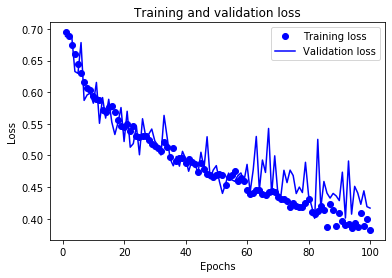

In [41]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation Accuracy

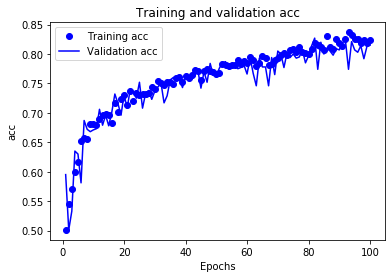

In [42]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [43]:
# saving model
model1.save('cats_and_dogs_small_2.h5')

# Feature extraction without DATA AUGMENTATION
  pretrained models mention in book Deep learning with Python by (François Chollet) (page no:145)
  
     Xception
     Inception V3
     ResNet50
     VGG16
     VGG19
     MobileNet

In [13]:
# we will use VGG16 model and extract features from it to use it on our data

# Description of VGG16 model
VGG16 (also called OxfordNet) is a convolutional neural network architecture named after the Visual Geometry Group from Oxford, who developed it.
It was used to win the ILSVR (ImageNet) competition in 2014.
To this day is it still considered to be an excellent vision model, although it has been somewhat outperformed by more revent advances such as Inception and ResNet.


In [14]:
import os
import numpy as np 
import shutil
import tensorflow as tf
import PIL.Image
import matplotlib.pyplot as plt

In [15]:
# location of files
# using files that we copied in the start

original_dataset_dir = "train"
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
print(train_dir)
print(validation_dir)
print(test_dir)

cats_and_dogs_small\train
cats_and_dogs_small\validation
cats_and_dogs_small\test


In [16]:
# loaded the model
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False, # refers to including (or not) the densely connected classifier
                  input_shape=(150, 150, 3))     # optional: if you don’t pass it,be able to process inputs of any size.

In [17]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [19]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                    directory,
                    target_size=(150, 150),
                    batch_size=batch_size,
                    class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [20]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

# Defining and training the densely connected classifier

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='binary_crossentropy',
                metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 0.6407 - acc: 0.6350 - val_loss: 0.4467 - val_acc: 0.8340
Epoch 2/30
2000/2000 [==============================] - 1s 422us/sample - loss: 0.4443 - acc: 0.7985 - val_loss: 0.3585 - val_acc: 0.8750
Epoch 3/30
2000/2000 [==============================] - 1s 441us/sample - loss: 0.3663 - acc: 0.8390 - val_loss: 0.3176 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 1s 422us/sample - loss: 0.3175 - acc: 0.8630 - val_loss: 0.2937 - val_acc: 0.8930
Epoch 5/30
2000/2000 [==============================] - 1s 464us/sample - loss: 0.2813 - acc: 0.8950 - val_loss: 0.2783 - val_acc: 0.8930
Epoch 6/30
2000/2000 [==============================] - 1s 447us/sample - loss: 0.2683 - acc: 0.8965 - val_loss: 0.2684 - val_acc: 0.8960
Epoch 7/30
2000/2000 [==============================] - 1s 464us/sample - loss: 0.2507 - acc: 0.9085 - val_loss: 0.2605 - val_

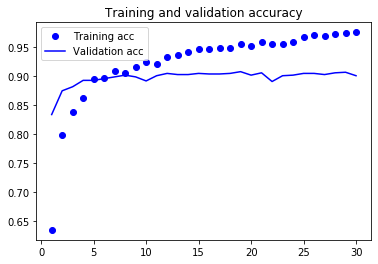

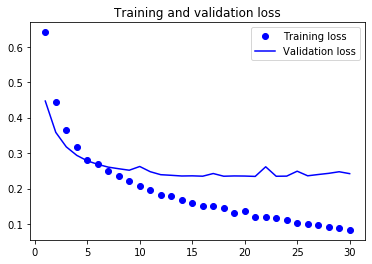

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# FEATURE EXTRACTION WITH DATA AUGMENTATION

Adding a densely connected classifier on top of the convolutional base

In [9]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


# freezing the convolutional base

In Keras, you freeze a network by setting its trainable attribute to False:

In [11]:
print('This is the number of trainable weights ''before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [12]:
conv_base.trainable = False

In [13]:
 print('This is the number of trainable weights ''after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


# Training the model end to end with a frozen convolutional base

In [14]:
# location of files
# using files that we copied in the start
import os

original_dataset_dir = "train"
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
print(train_dir)
print(validation_dir)
print(test_dir)

cats_and_dogs_small\train
cats_and_dogs_small\validation
cats_and_dogs_small\test


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [16]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [19]:
validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size=(150, 150),
                        batch_size=20,
                        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [20]:
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=2e-5),
                metrics=['acc'])

In [21]:
history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=30,
                validation_data=validation_generator,
                validation_steps=50)

Epoch 1/30
100/100 [==============================] - 101s 1s/step - loss: 0.6084 - acc: 0.6665 - val_loss: 0.4520 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 93s 926ms/step - loss: 0.4786 - acc: 0.8005 - val_loss: 0.3736 - val_acc: 0.8500
Epoch 3/30
100/100 [==============================] - 92s 925ms/step - loss: 0.4402 - acc: 0.7995 - val_loss: 0.3310 - val_acc: 0.8670
Epoch 4/30
100/100 [==============================] - 92s 924ms/step - loss: 0.4031 - acc: 0.8155 - val_loss: 0.3180 - val_acc: 0.8710
Epoch 5/30
100/100 [==============================] - 94s 936ms/step - loss: 0.3972 - acc: 0.8160 - val_loss: 0.3071 - val_acc: 0.8700
Epoch 6/30
100/100 [==============================] - 101s 1s/step - loss: 0.3778 - acc: 0.8325 - val_loss: 0.2815 - val_acc: 0.8770
Epoch 7/30
100/100 [==============================] - 101s 1s/step - loss: 0.3578 - acc: 0.8495 - val_loss: 0.2754 - val_acc: 0.8810
Epoch 8/30
100/100 [==============================] - 101s 1s

# FEATURE EXTRACTION WITH DATA AUGMENTATION and Fine-tuning

1 Add your custom network on top of an already-trained base network.

2 Freeze the base network.

3 Train the part you added.

4 Unfreeze some layers in the base network.

5 Jointly train both these layers and the part you added.

You already completed the first three steps when doing feature extraction. Let’s proceed with step 4: you’ll unfreeze your conv_base and then freeze individual layers
inside it.

In [23]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [24]:
len(model.trainable_weights)

4

In [25]:
conv_base.trainable = True

In [26]:
len(model.trainable_weights)

30

Freezing all layers up to a specific one

In [28]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [29]:
len(model.trainable_weights)

10

 Fine-tuning the model

In [30]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])

In [32]:
epochs = 10 # 100
history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=50)

Epoch 1/10
100/100 [==============================] - 94s 936ms/step - loss: 0.1364 - acc: 0.9435 - val_loss: 0.1861 - val_acc: 0.9280
Epoch 2/10
100/100 [==============================] - 94s 936ms/step - loss: 0.1211 - acc: 0.9505 - val_loss: 0.1888 - val_acc: 0.9290
Epoch 3/10
100/100 [==============================] - 94s 936ms/step - loss: 0.1122 - acc: 0.9570 - val_loss: 0.1777 - val_acc: 0.9350
Epoch 4/10
100/100 [==============================] - 102s 1s/step - loss: 0.1103 - acc: 0.9560 - val_loss: 0.1978 - val_acc: 0.9310
Epoch 5/10
100/100 [==============================] - 103s 1s/step - loss: 0.1130 - acc: 0.9575 - val_loss: 0.1767 - val_acc: 0.9360
Epoch 6/10
100/100 [==============================] - 102s 1s/step - loss: 0.1021 - acc: 0.9645 - val_loss: 0.2693 - val_acc: 0.9190
Epoch 7/10
100/100 [==============================] - 103s 1s/step - loss: 0.0993 - acc: 0.9615 - val_loss: 0.2289 - val_acc: 0.9250
Epoch 8/10
100/100 [==============================] - 103s 1s/s

In [37]:
# saving model
model.save('cats_and_dogs_small_3.h5')

# Evaluation

In [34]:
test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(150, 150),
                    batch_size=20,
                    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [35]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.938
